In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import warning

In [33]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [34]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [35]:
#replace the positive infinity and negative infinity if there exists any in the dataset
pharma_data.replace([np.inf, -np.inf], np.nan, inplace=True)

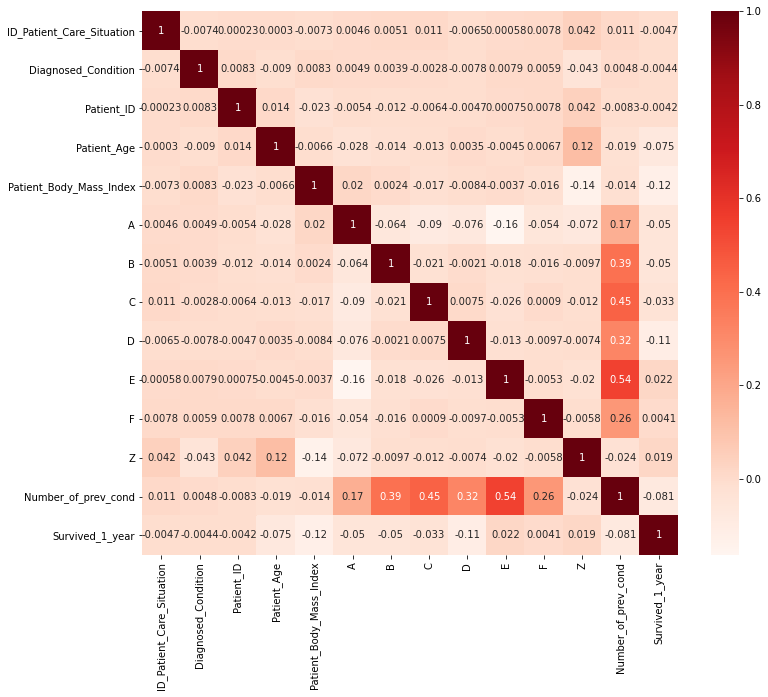

In [36]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pharma_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
pharma_data.drop(['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition','Z'],axis=1,inplace=True)

In [38]:
pharma_data.isnull().sum()

Diagnosed_Condition           0
Treated_with_drugs           13
Patient_Age                   0
Patient_Body_Mass_Index       0
Patient_Smoker                0
Patient_Rural_Urban           0
A                          1235
B                          1235
C                          1235
D                          1235
E                          1235
F                          1235
Number_of_prev_cond        1235
Survived_1_year               0
dtype: int64

In [39]:
#fill the missing value
pharma_data['Number_of_prev_cond']=pharma_data['Number_of_prev_cond'].fillna(method='ffill')
pharma_data['A']=pharma_data['A'].fillna(method='ffill')
pharma_data['B']=pharma_data['B'].fillna(method='ffill')
pharma_data['C']=pharma_data['C'].fillna(method='ffill')
pharma_data['D']=pharma_data['D'].fillna(method='ffill')
pharma_data['E']=pharma_data['E'].fillna(method='ffill')
pharma_data['F']=pharma_data['F'].fillna(method='ffill')
#pharma_data['Z']=pharma_data['Z'].fillna(method='ffill')
pharma_data['Treated_with_drugs']=pharma_data['Treated_with_drugs'].fillna(method='ffill')

In [40]:
pharma_data.isnull().sum()

Diagnosed_Condition        0
Treated_with_drugs         0
Patient_Age                0
Patient_Body_Mass_Index    0
Patient_Smoker             0
Patient_Rural_Urban        0
A                          0
B                          0
C                          0
D                          0
E                          0
F                          0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [41]:
pharma_data['Number_of_prev_cond'].value_counts()

1.0    9939
2.0    9504
3.0    3197
4.0     420
5.0      37
Name: Number_of_prev_cond, dtype: int64

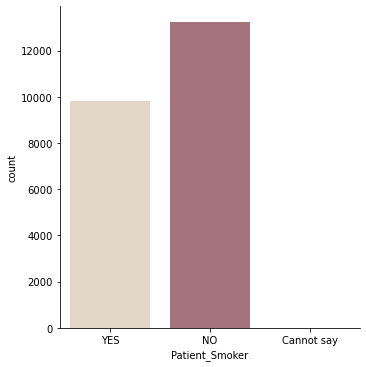

In [42]:
sns.catplot(x="Patient_Smoker", kind="count", palette="ch:.25", data=pharma_data)

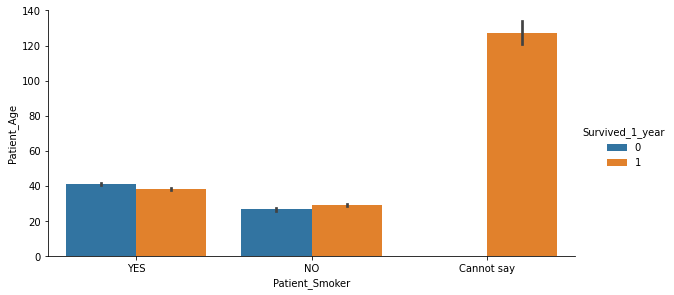

In [43]:
sns.catplot(x="Patient_Smoker", y="Patient_Age", hue="Survived_1_year", kind="bar", height=4, aspect=8/4,data=pharma_data)

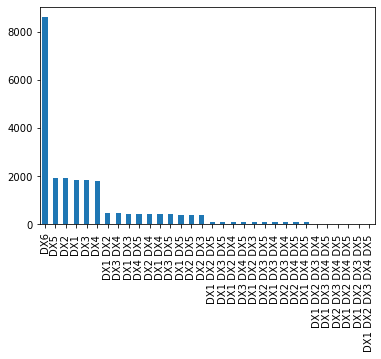

<Figure size 360x1080 with 0 Axes>

In [44]:
pharma_data['Treated_with_drugs'].value_counts().plot.bar()
plt.figure(figsize = (5,15))
plt.show()

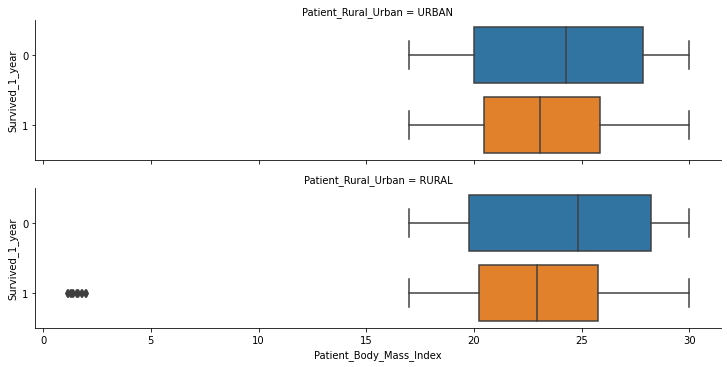

In [45]:
g = sns.catplot(x="Patient_Body_Mass_Index", y="Survived_1_year", row="Patient_Rural_Urban",
                kind="box", orient="h", height=2.5, aspect=4,
                data=pharma_data)

In [46]:
cat=pharma_data.select_dtypes(include=['object']).copy()

In [47]:
cat.head()

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban
0,DX6,YES,URBAN
1,DX2,YES,RURAL
2,DX6,YES,RURAL
3,DX1,NO,URBAN
4,DX1,Cannot say,RURAL


In [48]:
numerical=pharma_data.select_dtypes(include=['number']).copy()

In [49]:
numerical.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [50]:
pharma_data.loc[(pharma_data.Patient_Age < 15),'AgeGroup'] = 'Kid'
pharma_data.loc[(pharma_data.Patient_Age>15),'AgeGroup'] = 'Youth'
pharma_data.loc[(pharma_data.Patient_Age >35),'AgeGroup'] = 'Old'

In [51]:
pharma_data.drop(['Patient_Age'],axis=1,inplace=True)

In [52]:
pharma_data['AgeGroup'].value_counts()

Old      10786
Youth     6818
Kid       5117
Name: AgeGroup, dtype: int64

<AxesSubplot:ylabel='Survived_1_year'>

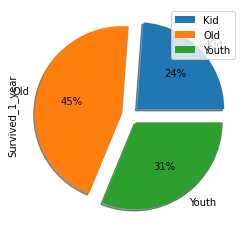

In [53]:
explode = (0.1, 0.1, 0.1)
pharma_data.groupby(['AgeGroup']).sum().plot(
    kind='pie', y='Survived_1_year', autopct='%1.0f%%', shadow=True, explode=explode)

In [54]:
pharma_data.loc[(pharma_data.Patient_Body_Mass_Index < 18.5),'BMI'] = 'Underweight'

In [55]:
pharma_data.loc[(pharma_data.Patient_Body_Mass_Index>18.5),'BMI'] = 'Healthy'
#pharma_data.loc[(pharma_data.Patient_Age >35),'AgeGroup'] = 'Old'

In [56]:
pharma_data.loc[(pharma_data.Patient_Body_Mass_Index>24.5),'BMI'] = 'Overweight'

In [57]:
pharma_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year,AgeGroup,BMI
0,8,DX6,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,Old,Underweight
1,5,DX2,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Old,Healthy
2,23,DX6,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,Old,Overweight
3,51,DX1,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Kid,Healthy
4,0,DX1,1.348400,Cannot say,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Old,Underweight


<AxesSubplot:ylabel='Survived_1_year'>

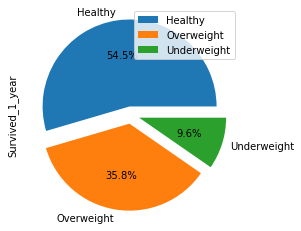

In [58]:
explode = (0.1, 0.1, 0.1)
pharma_data.groupby(['BMI']).sum().plot(
    kind='pie', y='Survived_1_year', autopct='%1.1f%%', shadow=False, explode=explode)